In [92]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import  Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [93]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [94]:
india_confirmed = confirmed_df[(confirmed_df['Country/Region'] == 'India') ].reset_index(drop=True)
india_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,India,21.0,78.0,0,0,0,0,0,0,...,142,156,194,244,330,396,499,536,657,727


In [95]:
cols = confirmed_df.keys()


In [96]:
confirmed = india_confirmed.loc[:, cols[12]:cols[-1]]
dates=confirmed.keys()

In [97]:
df=pd.DataFrame(dates)
df=df.rename({0: "Date"},axis='columns')


In [98]:
df1=pd.DataFrame(confirmed.T)
df1=df1.reset_index(drop=True)
df1=df1.rename({0: "Confirmed"},axis='columns')


In [99]:
y = df.Date.values
x=df1.Confirmed.values

In [100]:
df2=pd.DataFrame([y,x])

In [101]:
data=df2.T
data=data.rename({0: "Date",1:"Confirmed"},axis='columns')

data

,Date,Confirmed
0,1/30/20,1
1,1/31/20,1
2,2/1/20,1
3,2/2/20,2
4,2/3/20,3
5,2/4/20,3
6,2/5/20,3
7,2/6/20,3
8,2/7/20,3
9,2/8/20,3


In [102]:
data.dtypes

Date         object
Confirmed    object
dtype: object

In [103]:
data['Confirmed']=data['Confirmed'].astype('int')

In [104]:
data.Date = pd.to_datetime(data.Date)
data=data.set_index('Date')
data

,Confirmed
Date,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3
2020-02-04,3
2020-02-05,3
2020-02-06,3
2020-02-07,3


In [105]:
train,test=data[:-12],data[-12:]

In [106]:
test

,Confirmed
Date,
2020-03-15,113
2020-03-16,119
2020-03-17,142
2020-03-18,156
2020-03-19,194
2020-03-20,244
2020-03-21,330
2020-03-22,396
2020-03-23,499


In [107]:
scaler = MinMaxScaler()
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)

C:\Users\VEERAMANI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [108]:
n_input=12
n_features=1

generator=TimeseriesGenerator(train,train,length=n_input,batch_size=6)
model=Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit(generator,epochs=180)

Epoch 1/180
6/6 [==============================] - 2s 281ms/step - loss: 0.1306
Epoch 2/180
6/6 [==============================] - 0s 24ms/step - loss: 0.1052
Epoch 3/180
6/6 [==============================] - 0s 30ms/step - loss: 0.0773
Epoch 4/180
6/6 [==============================] - 0s 23ms/step - loss: 0.0622
Epoch 5/180
6/6 [==============================] - 0s 25ms/step - loss: 0.0445
Epoch 6/180
6/6 [==============================] - 0s 29ms/step - loss: 0.0363
Epoch 7/180
6/6 [==============================] - 0s 40ms/step - loss: 0.0323
Epoch 8/180
6/6 [==============================] - 0s 38ms/step - loss: 0.0259
Epoch 9/180
6/6 [==============================] - 0s 27ms/step - loss: 0.0177
Epoch 10/180
6/6 [==============================] - 0s 23ms/step - loss: 0.0102
Epoch 11/180
6/6 [==============================] - 0s 25ms/step - loss: 0.0061
Epoch 12/180
6/6 [==============================] - 0s 22ms/step - loss: 0.0103
Epoch 13/180
6/6 [==============================

6/6 [==============================] - 0s 26ms/step - loss: 0.0041
Epoch 104/180
6/6 [==============================] - 0s 25ms/step - loss: 0.0042
Epoch 105/180
6/6 [==============================] - 0s 27ms/step - loss: 0.0033
Epoch 106/180
6/6 [==============================] - 0s 25ms/step - loss: 0.0041
Epoch 107/180
6/6 [==============================] - 0s 26ms/step - loss: 0.0045
Epoch 108/180
6/6 [==============================] - 0s 25ms/step - loss: 0.0033
Epoch 109/180
6/6 [==============================] - 0s 25ms/step - loss: 0.0035
Epoch 110/180
6/6 [==============================] - 0s 25ms/step - loss: 0.0043
Epoch 111/180
6/6 [==============================] - 0s 25ms/step - loss: 0.0054
Epoch 112/180
6/6 [==============================] - 0s 25ms/step - loss: 0.0042
Epoch 113/180
6/6 [==============================] - 0s 38ms/step - loss: 0.0033
Epoch 114/180
6/6 [==============================] - 0s 46ms/step - loss: 0.0027
Epoch 115/180
6/6 [=======================

In [109]:
pred_list=[]
batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [110]:
df_predict=pd.DataFrame(scaler.inverse_transform(pred_list),index=data[-n_input:].index,columns=['Predictions'])
df_test=pd.concat([data,df_predict],axis=1)

In [111]:
df_test.tail(12)

,Confirmed,Predictions
Date,,
2020-03-15,113,116.421473
2020-03-16,119,136.486086
2020-03-17,142,159.741180
2020-03-18,156,188.615647
2020-03-19,194,225.400027
2020-03-20,244,273.403528
2020-03-21,330,338.109350
2020-03-22,396,429.419182
2020-03-23,499,564.687824


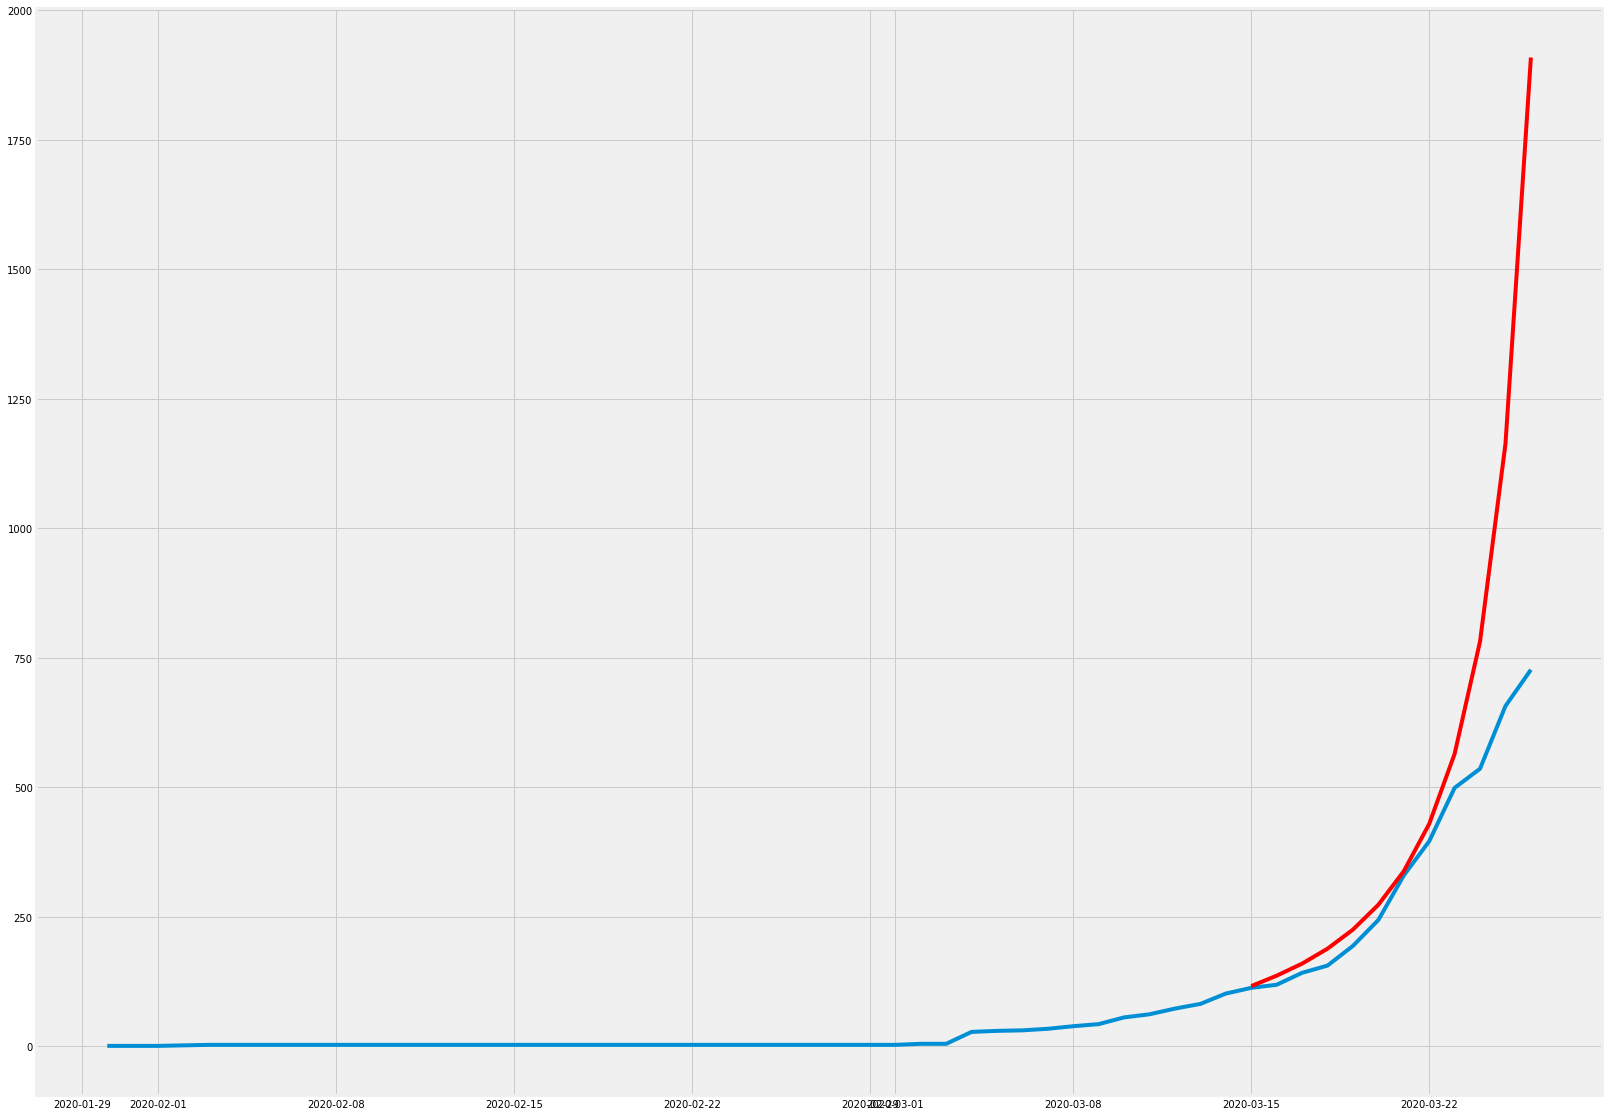

In [112]:
plt.figure(figsize=(25,20))
plt.plot(df_test.index,df_test['Confirmed'])
plt.plot(df_test.index,df_test['Predictions'],color='r')
plt.show()

In [113]:
train=data

scaler.fit(train)
train=scaler.transform(train) 

n_input=12
n_features=1

generator=TimeseriesGenerator(train,train,length=n_input,batch_size=6)

model.fit(generator,epochs=180)

pred_list=[]
batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

Epoch 1/180
3/8 [==========>...................] - ETA: 0s - loss: 4.9729e-04

C:\Users\VEERAMANI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


8/8 [==============================] - 0s 37ms/step - loss: 5.8606e-04
Epoch 2/180
8/8 [==============================] - 0s 45ms/step - loss: 7.1032e-04
Epoch 3/180
8/8 [==============================] - 0s 41ms/step - loss: 6.9103e-04
Epoch 4/180
8/8 [==============================] - 0s 26ms/step - loss: 0.0016
Epoch 5/180
8/8 [==============================] - 0s 26ms/step - loss: 0.0020
Epoch 6/180
8/8 [==============================] - 0s 25ms/step - loss: 0.0014
Epoch 7/180
8/8 [==============================] - 0s 25ms/step - loss: 0.0016
Epoch 8/180
8/8 [==============================] - 0s 26ms/step - loss: 6.5867e-04
Epoch 9/180
8/8 [==============================] - 0s 27ms/step - loss: 0.0018
Epoch 10/180
8/8 [==============================] - 0s 29ms/step - loss: 0.0025
Epoch 11/180
8/8 [==============================] - 0s 34ms/step - loss: 0.0020
Epoch 12/180
8/8 [==============================] - 0s 36ms/step - loss: 0.0019
Epoch 13/180
8/8 [===========================

8/8 [==============================] - 0s 27ms/step - loss: 0.0016
Epoch 101/180
8/8 [==============================] - 0s 27ms/step - loss: 0.0021
Epoch 102/180
8/8 [==============================] - 0s 27ms/step - loss: 0.0051
Epoch 103/180
8/8 [==============================] - 0s 26ms/step - loss: 0.0012
Epoch 104/180
8/8 [==============================] - 0s 25ms/step - loss: 0.0017
Epoch 105/180
8/8 [==============================] - 0s 26ms/step - loss: 0.0020
Epoch 106/180
8/8 [==============================] - 0s 26ms/step - loss: 0.0016
Epoch 107/180
8/8 [==============================] - 0s 28ms/step - loss: 0.0016
Epoch 108/180
8/8 [==============================] - 0s 26ms/step - loss: 7.8175e-04
Epoch 109/180
8/8 [==============================] - 0s 26ms/step - loss: 5.4775e-04
Epoch 110/180
8/8 [==============================] - 0s 25ms/step - loss: 0.0011
Epoch 111/180
8/8 [==============================] - 0s 26ms/step - loss: 0.0012
Epoch 112/180
8/8 [===============

In [114]:
from pandas.tseries.offsets import DateOffset
add_dates=[data.index[-1]+DateOffset(days=x) for x in range(0,13)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=data.columns)

In [115]:
future_dates.tail(12)

,Confirmed
2020-03-27,NaN
2020-03-28,NaN
2020-03-29,NaN
2020-03-30,NaN
2020-03-31,NaN
2020-04-01,NaN
2020-04-02,NaN
2020-04-03,NaN
2020-04-04,NaN
2020-04-05,NaN


In [116]:
df_predict=pd.DataFrame(scaler.inverse_transform(pred_list),
                        index=future_dates[-n_input:].index,columns=['Predictions'])
df_proj=pd.concat([data,df_predict],axis=1)

In [117]:
df_proj.tail(12)

,Confirmed,Predictions
2020-03-27,NaN,818.359543
2020-03-28,NaN,917.514885
2020-03-29,NaN,1020.934086
2020-03-30,NaN,1127.087447
2020-03-31,NaN,1234.875920
2020-04-01,NaN,1342.752930
2020-04-02,NaN,1449.474897
2020-04-03,NaN,1553.745883
2020-04-04,NaN,1654.772695
2020-04-05,NaN,1751.597355


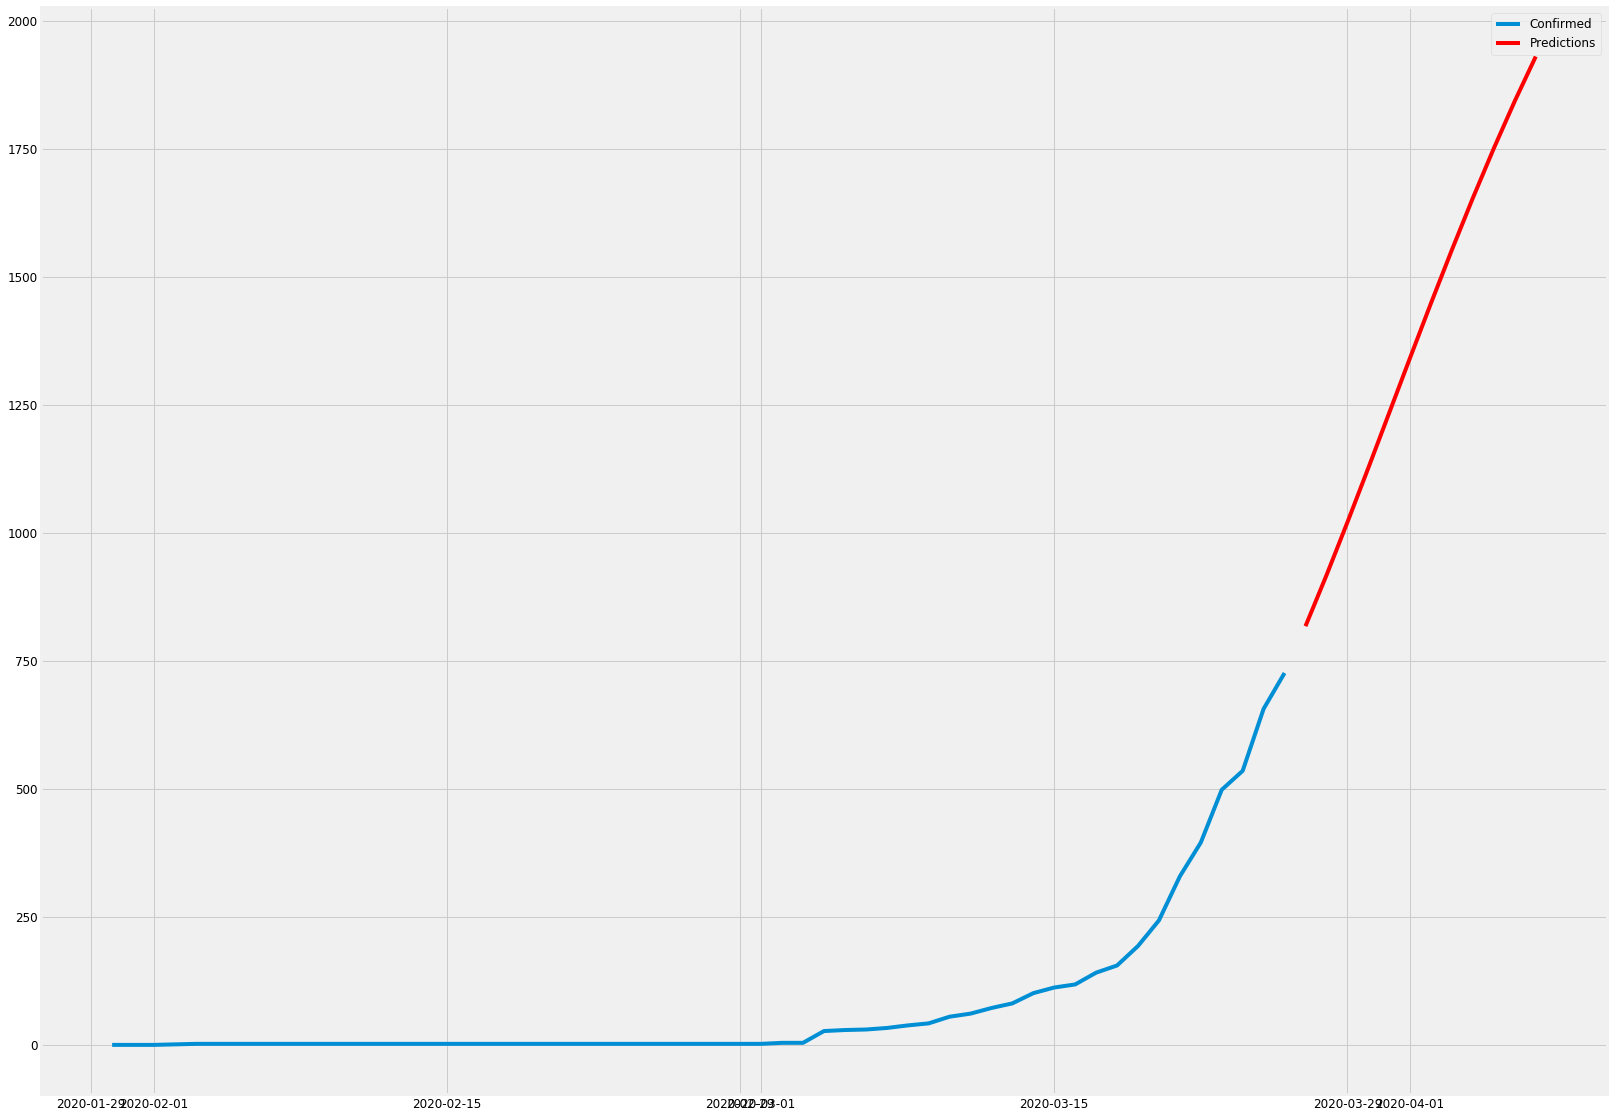

In [118]:
plt.figure(figsize=(25,20))
plt.plot(df_proj.index,df_proj['Confirmed'])
plt.plot(df_proj.index,df_proj['Predictions'],color='r')
plt.legend(loc='best',fontsize='large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()